<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/tps/2c2024/ICDIC_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 3: Modelos de Regresión
**Objetivos:** Con este trabajo práctico se busca que los alumnos comiencen a familiarizarse con las herramientas de inferencia estadística para la obtención de los parámetros de un modelo, pero ahora condicionado a a variables predictoras. Esto se hará a partir de 2 ejercicios de aplicación profesional.

**Librerías:** En este trabajo se utilizará

*   Numpy: matemática básica y definición de matrices y vectores; simulación de variables aleatorias
*   Seaborn: construcción de gráficos
*   Bambi: Librería basada en PyMC para la inferencia estadística utilizando cadenas de Markov

También necesitaremos de la librería ArviZ para ver los resultados de nuestra inferencia.






In [ ]:
# Instalación e import de Bambi
try:
  import bambi as bmb
except:
  !pip install bambi
  import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import pandas as pd
import io

# para registrar el tiempo de corrida
import datetime

In [ ]:
start_datetime = datetime.datetime.now()

print('Inicio de corrida: ',start_datetime)

Inicio de corrida:  2024-11-15 13:29:38.091295


Grupo:

Integrantes:

*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX

## Ejercicio 1: El mejor grado de polinomio para un dataset

El primer ejercicio tiene como objetivo replicar los gráficos vistos en clase de ajuste de polinomios. Simplemente vamos a cargar los modelos para ir viendo distintas formas de hacerlo, y luego seleccionaremos un modelo para predecir datos nuevos.

El objetivo es contestar la siguiente pregunta: ¿Cuál es la probabilidad de que $y>0$ dado $x=20$?

In [ ]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving synthetic_tp3_poly.csv to synthetic_tp3_poly.csv


In [ ]:
#Se crea un DataFrame
df_poly = pd.read_csv(io.BytesIO(uploaded['synthetic_tp3_poly.csv']))
df_poly.head()

,X,y
0,12.662012,2.704232
1,25.476867,-5.203239
2,26.503127,-4.006719
3,22.844023,-5.043336
4,13.074301,1.797265


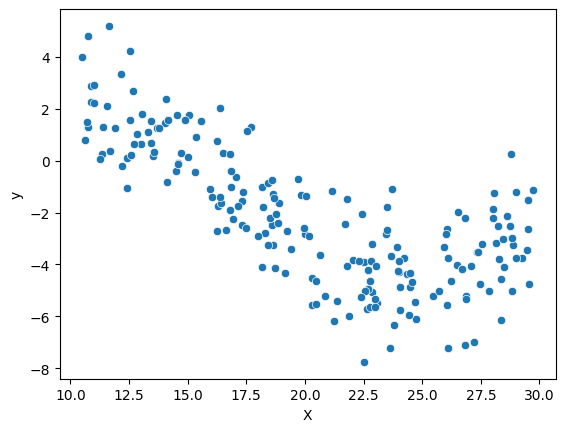

In [ ]:
sns.scatterplot(df_poly,x='X',y='y')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Ajuste como recta (p=1)

#### Actividad 1

**Actividad**: Ajuste en `Bambi` una recta $y = A\ X +B$ a partir de los datos. Es decir, obtenga las distribuciones posteriores de los parámetros del siguiente modelo de generación de datos:

$$y|X\sim N\left(\mu=A\ X+B,\sigma=\sigma\right)$$

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model_lin =
################################################################################

model_lin.build()
model_lin.graph()

A continuación puede ver un resumen de los parámetros del modelo con sus IC:

In [ ]:
# Obtencion de simulaciones de la posterior
results_lin = model_lin.fit(chains=4,draws=2000)

# Parámetros del modelo
az.plot_forest(results_lin,combined=True)
plt.show()

Y, a continuación, puede ver el ajuste en función de $X$

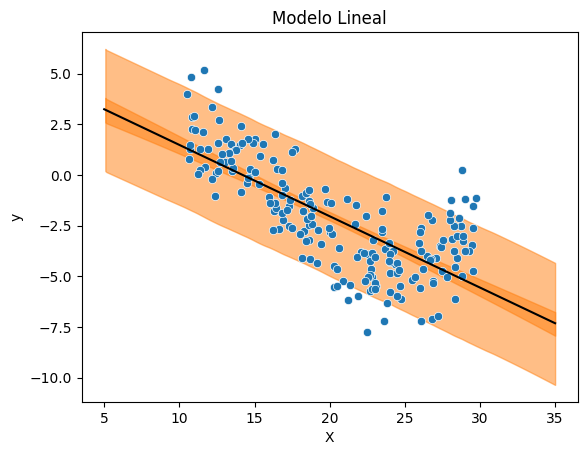

In [ ]:
# Hacer simulaciones para nuevos valores de X
pd_new = pd.DataFrame({'X':np.linspace(5,35,101)})

# Prediccion de datos no observados
new_lin = model_lin.predict(results_lin,data=pd_new,inplace=False,kind="response")

# Una visualización de ejemplo
az.plot_hdi(pd_new.X,new_lin.posterior['mu'],hdi_prob=0.9)
az.plot_hdi(pd_new.X,new_lin.posterior_predictive['y'],hdi_prob=0.9)
plt.plot(pd_new.X,new_lin.posterior['mu'].mean(axis=(0,1)),color='k')
sns.scatterplot(df_poly,x='X',y='y')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Modelo Lineal')
plt.show()

### Ajuste como parábola (p=2)

#### Actividad 2

**Actividad**: Ajuste en `Bambi` una parábola $y = A\ X^{2} + B\ X +C$ a partir de los datos. Es decir, obtenga las distribuciones posteriores de los parámetros del siguiente modelo de generación de datos:

$$y|X\sim N\left(\mu=A\ X^{2} + B\ X + C,\sigma=\sigma\right)$$


*NOTA: Usando llaves en la fórmula de* `Bambi` *es posible generar variables nuevas. Por ejemplo* `{X+3}` *crea un nuevo dato* $X+3$ *sin necesidad de generar una nueva columna en el dataframe. Esto le puede servir para incorporar la componente cuadrática*

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model_quad =
################################################################################

model_quad.build()
model_quad.graph()

In [ ]:
# Obtencion de simulaciones de la posterior
results_quad = model_quad.fit(chains=4,draws=2000)

# Parámetros del modelo
az.plot_forest(results_quad,combined=True)
plt.show()

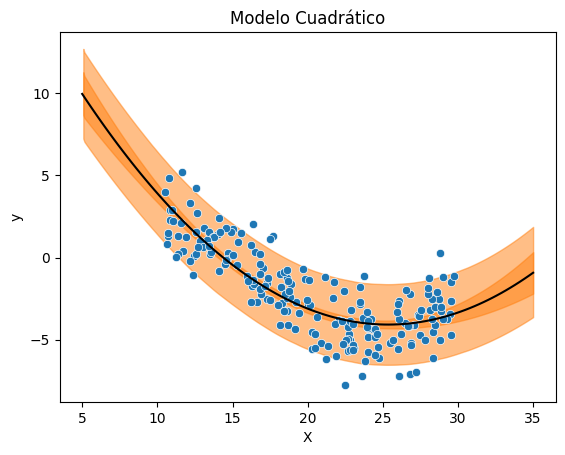

In [ ]:
# Prediccion de datos no observados
new_quad = model_quad.predict(results_quad,data=pd_new,inplace=False,kind="response")

# Una visualización de ejemplo
az.plot_hdi(pd_new.X,new_quad.posterior['mu'],hdi_prob=0.9)
az.plot_hdi(pd_new.X,new_quad.posterior_predictive['y'],hdi_prob=0.9)
plt.plot(pd_new.X,new_quad.posterior['mu'].mean(axis=(0,1)),color='k')
sns.scatterplot(df_poly,x='X',y='y')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Modelo Cuadrático')
plt.show()

### Ajuste como cúbica (p=3)

#### Actividad 3

**Actividad**: Ajuste en `Bambi` una cúbica $y = A\ X^{3} + B\ X^{2} +C\ X +D$ a partir de los datos. Es decir, obtenga las distribuciones posteriores de los parámetros del siguiente modelo de generación de datos:

$$y|X\sim N\left(\mu=A\ X^{3} + B\ X^{2} +C\ X +D,\sigma=\sigma\right)$$

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model_cube =
################################################################################

model_cube.build()
model_cube.graph()

In [ ]:
# Obtencion de simulaciones de la posterior
results_cube = model_cube.fit(chains=4,draws=2000)

# Parámetros del modelo
az.plot_forest(results_cube,combined=True)
plt.show()

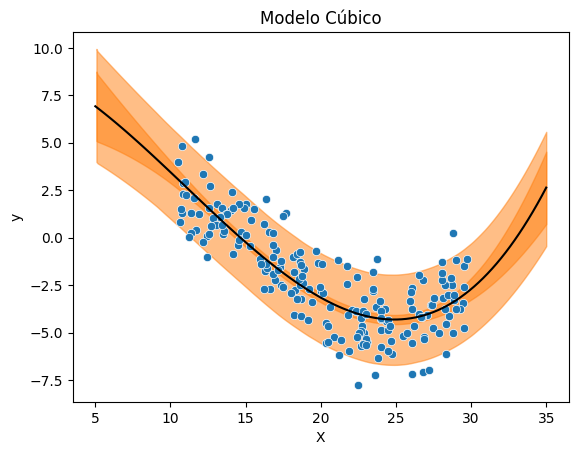

In [ ]:
# Prediccion de datos no observados
new_cube = model_cube.predict(results_cube,data=pd_new,inplace=False,kind="response")

# Una visualización de ejemplo
az.plot_hdi(pd_new.X,new_cube.posterior['mu'],hdi_prob=0.9)
az.plot_hdi(pd_new.X,new_cube.posterior_predictive['y'],hdi_prob=0.9)
plt.plot(pd_new.X,new_cube.posterior['mu'].mean(axis=(0,1)),color='k')
sns.scatterplot(df_poly,x='X',y='y')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Modelo Cúbico')
plt.show()

### Ajuste con polinomio de orden 4 (p=4)

#### Actividad 4

**Actividad**: Ajuste en `Bambi` un polinomio de orden 4 $y(x)$ a partir de los datos.

*Nota: Para polinomios de mayor grado, es mejor reescribir la ecuación en como suma de polinomios ortogonales entre sí (va a converger mucho más rápido. En* `Bambi`*, pueden hacerlo escribiendo* `poly(X,p)`*donde* $p$ *es el orden del polinomio a considerar para la variable* $X$

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model_cuar =
################################################################################

model_cuar.build()
model_cuar.graph()

In [ ]:
# Obtencion de simulaciones de la posterior
results_cuar = model_cuar.fit(chains=4,draws=2000)

# Parámetros del modelo
az.plot_forest(results_cuar,combined=True)
plt.show()

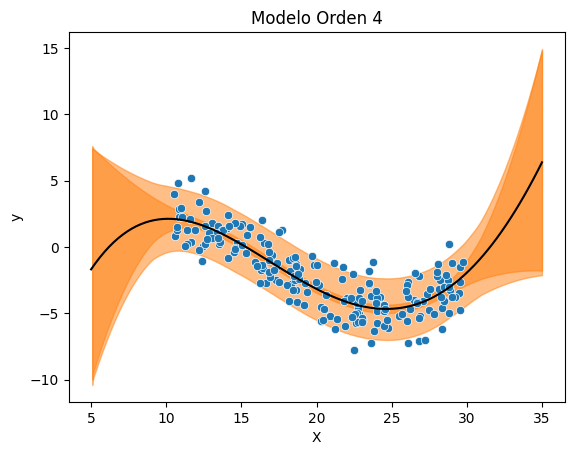

In [ ]:
# Prediccion de datos no observados
new_cuar = model_cuar.predict(results_cuar,data=pd_new,inplace=False,kind="response")

# Una visualización de ejemplo
az.plot_hdi(pd_new.X,new_cuar.posterior['mu'],hdi_prob=0.9)
az.plot_hdi(pd_new.X,new_cuar.posterior_predictive['y'],hdi_prob=0.9)
plt.plot(pd_new.X,new_cuar.posterior['mu'].mean(axis=(0,1)),color='k')
sns.scatterplot(df_poly,x='X',y='y')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Modelo Orden 4')
plt.show()

### Ajuste con polinomio de orden 7 (p=7)

#### Actividad 5

**Actividad**: Ajuste en `Bambi` un polinomio de orden 7 para $y(x)$ a partir de los datos.

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model_sept =
################################################################################

model_sept.build()
model_sept.graph()

In [ ]:
# Obtencion de simulaciones de la posterior
results_sept = model_sept.fit(chains=4,draws=2000)

# Parámetros del modelo
az.plot_forest(results_sept,combined=True)
plt.show()

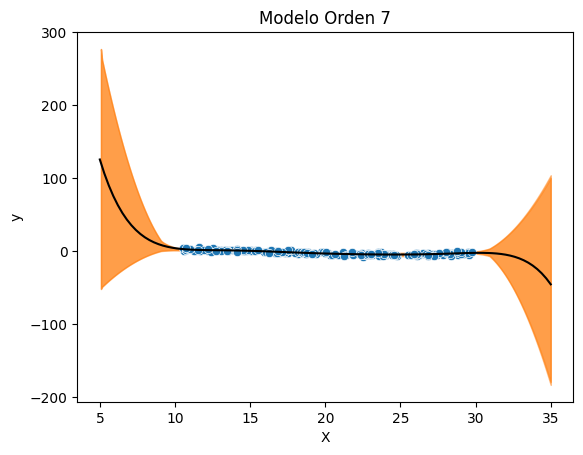

In [ ]:
# Prediccion de datos no observados
new_sept = model_sept.predict(results_sept,data=pd_new,inplace=False,kind="response")

# Una visualización de ejemplo
az.plot_hdi(pd_new.X,new_sept.posterior['mu'],hdi_prob=0.9)
az.plot_hdi(pd_new.X,new_sept.posterior_predictive['y'],hdi_prob=0.9)
plt.plot(pd_new.X,new_sept.posterior['mu'].mean(axis=(0,1)),color='k')
sns.scatterplot(df_poly,x='X',y='y')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Modelo Orden 7')
plt.show()

### Selección de modelos

Habiendo construido 5 posibles modelos para describir la relación entre $x$ e $y$, veamos cuál es el que mejor se ajusta a los datos. Nuestro objetivo es contestar eso mediante PSISLOO-CV, estimando la capacidad predictiva "out-of-sample" de los modelos.

Como no lo hicimos durante la inferencia (o si, dependerá de lo que hicieron ustedes), a continuación les dejamos una función para calcular las log-verosimilitudes.

In [ ]:
# Log verosimilitud modelo 1
model_lin.compute_log_likelihood(results_lin)

# Log verosimilitud modelo 2
model_quad.compute_log_likelihood(results_quad)

# Log verosimilitud modelo 3
model_cube.compute_log_likelihood(results_cube)

# Log verosimilitud modelo 4
model_cuar.compute_log_likelihood(results_cuar)

# Log verosimilitud modelo 7
model_sept.compute_log_likelihood(results_sept)

#### Actividad 6

**Actividad**: Compare la capacidad predictiva de los modelos y elija en consecuencia el modelo con el que usted se quedaría para predecir nuevos datos. Guárdelo en una variable `model_final` y los resultados de la inferencia en `results_final`.

In [ ]:
# CODIGO DEL ALUMNO ############################################################
dict_model =

comp =
################################################################################
comp

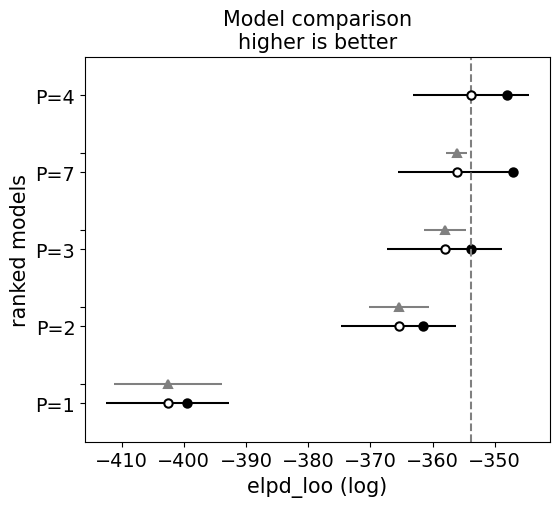

In [ ]:
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model_final =
results_final =
################################################################################

#### Actividad 7

**Actividad**: Conteste las siguientes preguntas:
- ¿Qué modelo tiene la mayor capacidad de predecir los datos vistos?
- ¿Qué modelo estima que tiene la mayor capacidad de predecir los datos no vistos?
- Si estos no coinciden, ¿por qué? ¿Qué está pasando?
- ¿El mejor modelo es significativamente mejor que el resto?
- ¿Usaría el modelo para extrapolar a rangos de $X$ no vistos?

**Su respuesta**:

### Análisis de residuos

A continuación se presenta el análisis de residuos de su modelo seleccionado.

In [ ]:
### Simulo los datos observados
model_final.predict(results_final)

fig, ax = plt.subplots( figsize=(6,3) )
for i in range(0,100):
  mu_pred = results_final.posterior["mu"].sel(chain=0,draw=i).values
  residuals = results_final.observed_data['y'] - mu_pred
  sns.kdeplot( residuals, ax=ax, linewidth=.3, alpha=.3, color='C0' )

ax.set_xlabel('residuos')
plt.show()

In [ ]:
fig, (axs) = plt.subplots(1, 2,figsize=(10,5))

for i in range(len(results_final.observed_data['y'])):
  mu_pred = results_final.posterior["mu"].sel(chain=0,draw=slice(1,150)).values[:,i]
  residuals = results_final.observed_data['y'].values[i] - mu_pred
  quantiles = np.quantile(residuals, 0.05), np.quantile(residuals, 0.95)
  axs[0].plot( [df_poly.X[i],df_poly.X[i]], quantiles, color='gray', alpha=.3 )
  axs[0].plot( df_poly.X[i], residuals.mean(), 'o', color='C0', markersize=2)

  axs[1].plot( [mu_pred.mean(),mu_pred.mean()], quantiles, color='gray', alpha=.3 )
  axs[1].plot(mu_pred.mean(), residuals.mean(), 'o', color='C0', markersize=2)

axs[0].axhline( y=0, linestyle='--', color='gray', linewidth=1.5)
axs[0].set_ylabel('residuo')
axs[0].set_xlabel('X')

axs[1].axhline( y=0, linestyle='--', color='gray', linewidth=1.5)
axs[1].set_ylabel('residuo')
axs[1].set_xlabel('Y estimado')
plt.show()

#### Actividad 8

**Actividad**: En base a los gráficos anteriores, ¿considera que su modelo es apropiado? Explique.

**Su respuesta**:

### Uso del modelo

Finalmente, si estamos contentos con el modelo podemos usarlo para contestar la pregunta:

- ¿Cuál es la probabilidad de que $y>0$ dado $x=22.5$?

#### Actividad 9

**Actividad**: Conteste la pregunta a partir de nuevas simulaciones.

In [ ]:
# CODIGO DEL ALUMNO ############################################################





P_y =
################################################################################

print('La probabilidad de que y>0 cuando X=20.0 es ',np.round(P_y*100,1),'%')

## Ejercicio 2: Estimación de los esfuerzos de los cables del Puente de la Mujer

En este ejercicio, vamos concentrarnos únicamente en lo que hace a la extracción de conclusiones a partir del modelo y sus resultados, y no necesariamente a su evaluación o la selección del modelo más apropiado.

### Introducción

En el año 2019 se realizaron ensayos en el Puente de la Mujer, Buenos Aires, para determinar las tensiones en los cables que lo decoran. Para ello, se generaba una acción impulsiva en los mismos con un martillo, registrándose las aceleraciones resultantes (el ensayo fue repetido con el puente en su configuración abierta y cerrada al paso de embarcaciones). Luego, a partir de la Transformada de Fourier y un algoritmo desarrollado específicamente para tal fin, se encontraron las frecuencias naturales $f_{n}$ y el número de modo asociado $n$.

<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1DD-Fy7vanfjr94VCq0zCaBI0JYlDUJMK'; width= 50%;
  height= auto />
<figcaption>Registro de aceleraciones del Cable 14 con puente en configuración cerrada</figcaption></center>
</figure>

El dataset presente a continuación tiene para todos los cables de puente y para ambas configuraciones de servicio, todos los valores de $n$ y $f_{n}$ encontrados a partir de los ensayos.

### Carga del Dataset



In [ ]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving Cables.csv to Cables.csv


In [ ]:
#Se crea un DataFrame
df_cables = pd.read_csv(io.BytesIO(uploaded['Cables.csv']))
df_cables.head()

,fn_Hz,n,N_Cable,Puente,long_m,masa_p_long_kg_m
0,5.027848,1,1,C,9.821,3.6
1,10.131991,2,1,C,9.821,3.6
2,15.548943,3,1,C,9.821,3.6
3,21.377890,4,1,C,9.821,3.6
4,27.748531,5,1,C,9.821,3.6


Como puede ver, el dataset tiene los siguientes datos:
- $n$ : n
- $L$ : long_m
- $\mu$ : masa_p_long_kg_m
- $f_{n}$ : fn_Hz
- Nro. de Cable: N_Cable (del 1 al 18)
- Condición del Puente: C (Cerrado), A (Abierto)

Sabemos a su vez (aunque no está en el dataset), que todos los cables tienen el mismo diámetro.

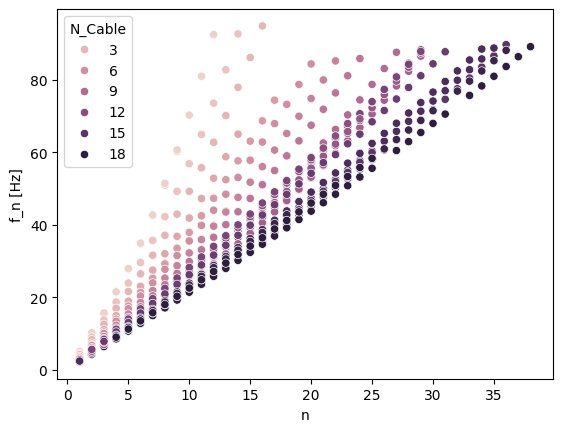

In [ ]:
sns.scatterplot(df_cables,x='n',y='fn_Hz',hue='N_Cable')
plt.xlabel('n')
plt.ylabel('f_n [Hz]')
plt.show()

Los datos parecieran tener cierta forma de recta, ¿no? A simple vista por lo menos. Y esas rectas dependen del número de cable.

### Nuestro Primer Modelo de Regresión Lineal

Hagamos un ajuste para uno de todos los Cables. Tomemos, como referencia, el Cable 14. Construyamos el modelo más "sencillo" de todos de regresión lineal.

$$f|n \sim N(\mu=a+b\cdot n,\sigma)$$

#### Actividad 1

**Actividad**: Cargue en `Bambi` el modelo de regresión propuesto.

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model0 =
################################################################################

model0.build()
model0.graph()

A continuación, puede ver la distribución posterior de los parámetros. Las simulaciones se encuentran en `results0`.

In [ ]:
# Obtencion de simulaciones de la posterior
results0 = model0.fit(chains=4,draws=2000)

# Resultados de la inferencia
az.plot_posterior(results0, hdi_prob=0.9)
plt.show()
az.summary(results0)

#### Actividad 2

Veamos ahora cuál fue el resultado de nuestra inferencia, y si se parece a los datos.

**Actividad**: Muestre en un mismo gráfico
- Los Datos
- La curva posterior predictiva del valor medio de $f|n$ en función de $n$
- El intervalo de confianza 90% para el valor medio
- El intervalo de confianza 90% para una nueva observación de $f|n$ en función de $n$

*Nota: La forma más fácil de obtener los puntos 1 a 3 es haciendo uso de la función `interpret.plot_predictions` de Bambi.*

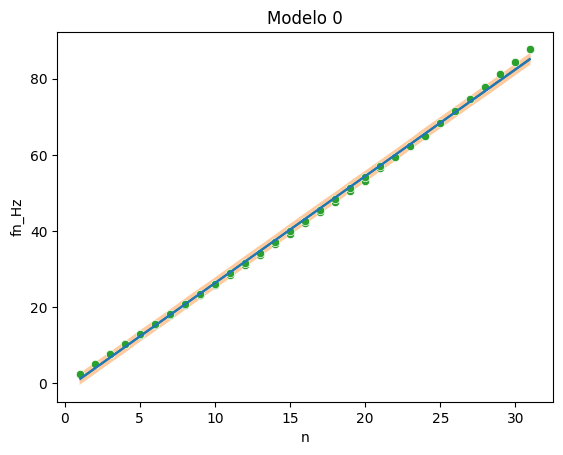

In [ ]:
# CODIGO DEL ALUMNO ############################################################





################################################################################
plt.show()

#### Actividad 3

A continuación, se presentan tres gráficos para el análisis de los residuos. El primero presenta la distribución de probabilidad de los residuos

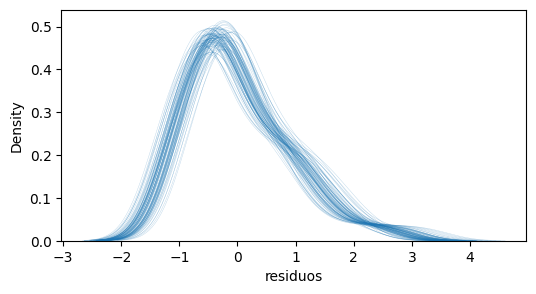

In [ ]:
y_obs = df_cables[df_cables['N_Cable']==14].fn_Hz

fig, ax = plt.subplots( figsize=(6,3) )
for i in range(0,100):
  mu_pred = results0.posterior["Intercept"].sel(chain=0,draw=i).values\
  +results0.posterior["n"].sel(chain=0,draw=i).values * df_cables[df_cables['N_Cable']==14].n
  residuals = y_obs - mu_pred
  sns.kdeplot( residuals, ax=ax, linewidth=.3, alpha=.3, color='C0' )

ax.set_xlabel('residuos')
plt.show()

El segundo gráfico muestra los residuos pero ahora en función del número de modo (es decir, se grafican distribuciones pero condicionado al valor de $n$, mostrados como un valor medio y su intervalo de confianza)

El tercer gráfico es igual, pero graficando en el eje $x$ la frecuencia estimada por el modelo para cada dato.

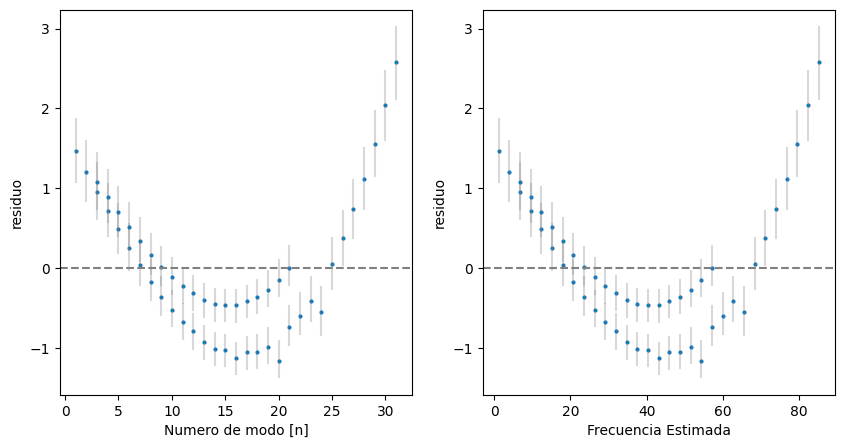

In [ ]:
y_obs = (df_cables[df_cables['N_Cable']==14].fn_Hz).to_numpy()

fig, (axs) = plt.subplots(1, 2,figsize=(10,5))

xx = (df_cables[df_cables['N_Cable']==14].n).to_numpy()

for i in range(len(xx)):
  mu_pred = results0.posterior["Intercept"].sel(chain=0,draw=slice(1,150)).values+\
  results0.posterior["n"].sel(chain=0,draw=slice(1,150)).values * xx[i]
  residuals = y_obs[i] - mu_pred
  quantiles = np.quantile(residuals, 0.05), np.quantile(residuals, 0.95)
  axs[0].plot( [xx[i],xx[i]], quantiles, color='gray', alpha=.3 )
  axs[0].plot( xx[i], residuals.mean(), 'o', color='C0', markersize=2)

  axs[1].plot( [mu_pred.mean(),mu_pred.mean()], quantiles, color='gray', alpha=.3 )
  axs[1].plot(mu_pred.mean(), residuals.mean(), 'o', color='C0', markersize=2)

axs[0].axhline( y=0, linestyle='--', color='gray', linewidth=1.5)
axs[0].set_ylabel('residuo')
axs[0].set_xlabel('Numero de modo [n]')

axs[1].axhline( y=0, linestyle='--', color='gray', linewidth=1.5)
axs[1].set_ylabel('residuo')
axs[1].set_xlabel('Frecuencia Estimada')
plt.show()

**Actividad**: ¿Puede afirmar que los desvíos siguen la siguiente distribución

$$\sigma \sim N(0,s)$$

con $s$ constante? ¿Por qué? Caso contrario, aclare dónde nota diferencias. En conjunto con la actividad anterior, ¿qué modelo pareciera que podría ser mejor?

**Su respuesta**:

### Teoría de Vibraciones en Cables (Construcción de Nuevas Variables)

La teoría de vibraciones en cables indica que existe una relación especial entre la frecuencia natural y el modo de vibración. Si lo hubiesemos sabido, ¡no hubiesemos probado con una recta!

$$ f_{n}= \sqrt{\frac{T}{4L^{2}\mu}n^{2}+\frac{EI\pi^{2}}{4L^{4}\mu}n^{4}}  $$

La ecuación es algo fea, ¿no? Yo tranquilamente podría ajustar esta curva la cual se asemeja a una parábola. ¡Sin embargo, reescribiendo las variables factible de transformarlo a una recta!

Trabajando algebraicamente, se puede despejar la tensión del cable $T$:

$$ T = 4 L ^{2} \left( \frac{f_n}{n}\right) ^{2} \mu - \left( \frac{EI}{L ^{2}}\right) ( n \pi ) ^{2}  $$

Donde $L$ es la longitud del cable, $\mu$ su masa por unidad de longitud, y $EI$ es la rigidez a flexión del cable. Reordenando la expresión de arriba, se tiene:

$$ 4 L ^{2}  \mu\ \left( \frac{f_n}{n}\right) ^{2} = T + EI\ \left( \frac{n \pi}{L}\right)^{2}  $$

Por lo que se puede analizar los datos obtenidos del ensayo a partir de la ecuación de una recta:

$$ y = T + EI\ x  $$

con $y = 4 L^{2}  \mu \left( \frac{f_n}{n}\right) ^{2}/ 1000$ para obtener $T$ en $kN$ y $x = \left( \frac{n \pi}{L}\right)^{2}$ para obtener $EI$ en $kNm^{2}$. Es decir, ¡$T$ es la ordenada al origen y $EI$ la pendiente!

Noten entonces que ahora mi variable explicativa es $x$, la cual explica a mi variable $y$.

Es habitual considerar que los cables no tienen rigidez a flexión a la hora de estimar sus esfuerzos. En esos casos, el problema se reduce a:

$$ y_{2} = T$$

con $y_{2} = 4 L^{2}  \mu \left( \frac{f_n}{n}\right) ^{2}/ 1000$ para obtener $T$ en $kN$.

**NOTA**: Para este trabajo práctico vamos a ignorar la incertidumbre en los datos del cable (Longitud y masa por unidad de longitud). Incorporarlo en el modelo es, sin embargo, bastante importante en la toma de decisiones.

**NOTA 2**: El modelo sin rigidez a flexión es equivalente a la recta que calcularon antes.

#### Actividad 4

En función de la teoría, en el modelo de regresión a construir la variable a predecir es $y = 4 L^{2}  \mu \left( \frac{f_n}{n}\right) ^{2}/ 1000$ y su posible variable explicativa es $x = \left( \frac{n \pi}{L}\right)^{2}$.

**Actividad**: Agregue al dataframe `df_cables` dos columnas `y` y `x` según su definición.

In [ ]:
# CODIGO DEL ALUMNO ############################################################





################################################################################

df_cables.head()

,fn_Hz,n,N_Cable,Puente,long_m,masa_p_long_kg_m,y,x
0,5.027848,1,1,C,9.821,3.6,35.110591,0.102327
1,10.131991,2,1,C,9.821,3.6,35.645398,0.409306
2,15.548943,3,1,C,9.821,3.6,37.310680,0.920939
3,21.377890,4,1,C,9.821,3.6,39.671954,1.637225
4,27.748531,5,1,C,9.821,3.6,42.777353,2.558164


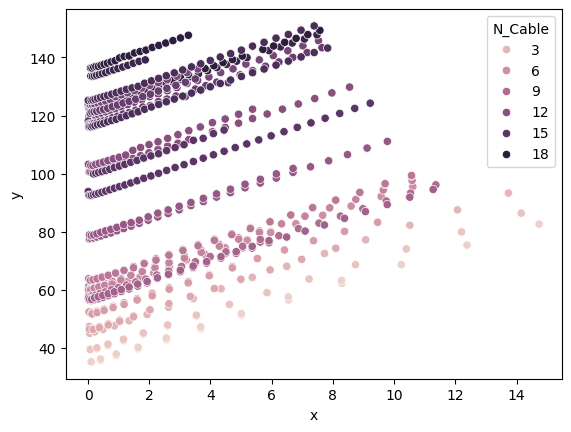

In [ ]:
sns.scatterplot(df_cables,x='x',y='y',hue='N_Cable')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Actividad 5

Preste atención al tipo de datos:

In [ ]:
df_cables.dtypes

,0
fn_Hz,float64
n,int64
N_Cable,int64
Puente,object
long_m,float64
masa_p_long_kg_m,float64
y,float64
x,float64


¡`N_cable` y `Puente` debieran ser variables categóricas pero las toma como números o texto! Seamos prolijos con nuestro dataset para no entrar en problemas con `Bambi`.

**Actividad**: Convierta a las variables mencionadas en variables categóricas.

In [ ]:
# CODIGO DEL ALUMNO ############################################################




################################################################################

df_cables.head()

,fn_Hz,n,N_Cable,Puente,long_m,masa_p_long_kg_m,y,x
0,5.027848,1,1,C,9.821,3.6,35.110591,0.102327
1,10.131991,2,1,C,9.821,3.6,35.645398,0.409306
2,15.548943,3,1,C,9.821,3.6,37.310680,0.920939
3,21.377890,4,1,C,9.821,3.6,39.671954,1.637225
4,27.748531,5,1,C,9.821,3.6,42.777353,2.558164


In [ ]:
df_cables.dtypes

,0
fn_Hz,float64
n,int64
N_Cable,category
Puente,category
long_m,float64
masa_p_long_kg_m,float64
y,float64
x,float64


### Nuestro Modelo (Completo) de Regresión

Con todo lo anterior tenemos que:

$$ y = T + EI\ x  $$

donde

- $x$ e $y$ son, a fin de cuentas, dato observados.
- $EI$ es la rigidez a flexión de cada cable --> $EI_{N\_Cable}$
- $T$ es el esfuerzo en el cable al momento del ensayo. Depende (en principio) tanto del cable en cuestión como de la configuración del puente al momento del ensayo --> $T_{N\_Cable,Puente}$

Por lo tanto:

$$ y = T_{N\_Cable,Puente} + EI_{N\_Cable}\ x  $$

Adoptando un modelo de generación de datos Normal para incorporar la incertidumbre (debido a errores de medición y efecto de simplificaciones en la teoría desarrollada) se tiene que:

$$y|N\_Cable,Puente,x \sim N\left(\mu = T_{N\_Cable,Puente} + EI_{N\_Cable}\ x,\sigma=\sigma\right)$$

Es decir, La variable $y$ observada es una función de la combinación "Número de Cable" y "Condición del Puente", y de la variable $x$ observada. Conociendo todo eso, el modelo es Normal.

#### Actividad 6

Falta definir una cosa: ¿cómo modelo el efecto combinado del número de cable y la configuración del puente?

**Actividad**: Conteste las siguientes preguntas, teniendo en cuenta que el Puente de la Mujer tiene 18 cables y 2 configuraciones de puente posibles

1. ¿Cuántos parámetros $T_{j}$ hay que estimar si se considera que el efecto de la configuración del puente es igual para todos los cables?
2. ¿Cuántos parámetros $T_{j}$ hay que estimar si se considera que el efecto de la configuración del puente es diferente para todos los cables?

Explique qué representa cada parámetro según el caso.

**Su respuesta**:

#### Actividad 7

Nuestro objetivo, además de obtener las tensiones en los cables para informar al dueño, es contestar las siguientes preguntas a futuro:

1. ¿El efecto de la configuración del puente es significativo? ¿Depende del Cable?
2. ¿La rigidez a flexión de los cables es distinta entre sí? ¿Es influyente en el cálculo de tensiones?

La forma de contestar estas preguntas es a través de un modelo que permita incorporar (si existen) estas diferencias y/o variables explicativas. Luego, el resultado de la inferencia (y la definición de un test de hipótesis) nos permitirá sacar conclusiones y, eventualmente, definir el modelo final.

Por ello vamos a construir el modelo completo de regresión visto arriba:

$$y|N\_Cable,Puente,x \sim N\left(\mu = T_{N\_Cable,Puente} + EI_{N\_Cable}\ x,\sigma=\sigma\right)$$

Como en principio no podemos saber cómo es el efecto combinado del número de cable y el efecto de la configuración del puente (y, por lo pronto, no hay razón para pensar que tienen efectos independientes en el esfuerzo $T$), vamos a plantear el caso como uno de interacción (Pregunta 2 de la Actividad anterior)

**Actividad**: Construya en Bambi el modelo propuesto *únicamente* para los Cables 10 y 14 (utilizando un dataframe reducido). Verifique que la cantidad de parámetros coincida con su respuesta en la Actividad anterior.

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model1 =

################################################################################

model1.build()
model1.graph()

A continuación, puede ver la distribución posterior de los parámetros. Las simulaciones se encuentran en `results1`.

In [ ]:
# Obtencion de simulaciones de la posterior
results1 = model1.fit(chains=4,draws=2000)

# Resultados de la inferencia
az.plot_posterior(results1, hdi_prob=0.9)
plt.show()

In [ ]:
# Resumen de la inferencia
az.summary(results1)

#### Actividad 8

Es importante que preste a atención al tamaño y orden en los que se encuentran las simulaciones de los parámetros en Bambi. A continuación, les dejamos el Inference Data.

Si mira en `Posterior`, `Data Variables` notará que, en las variables que tienen interacción, las simulaciones tienen una tercera dimensión (Chain, Draw, Dim). Esa tercera, última dimensión indica a qué caso categórico corresponde ese dato (de 0 a N_dim-1).

El orden en los que se encuentran la simulaciones lo pueden encontrrar en `Posterior`, `Coordinates`.

In [ ]:
results1

**Actividad**: Separe y/o aisle cada parámetro (tantos como tenga su modelo) en su array propio de simulaciones. Las dimensiones de estos arrays debiera ser de (Chain, Draw). Nombre los mismos de alguna forma alegórica para reconocer de qué se trata (por ejemplo, $EI\_10$ para la rigidez a flexión del cable 10, $sigma$ para el desvío del modelo normal, etc.).

In [ ]:
# CODIGO DEL ALUMNO ############################################################
# Tensiones


# Rigideces a Flexión

# Desvio

################################################################################

#### Actividad 9

A continuación se muestra en un mismo gráfico:

- Los datos de los Cables 10 y 14, identificando la configuración del puente
- La predicción en función de x, la configuración del cable y el número de cable
- El intervalo de confianza para una nueva observación

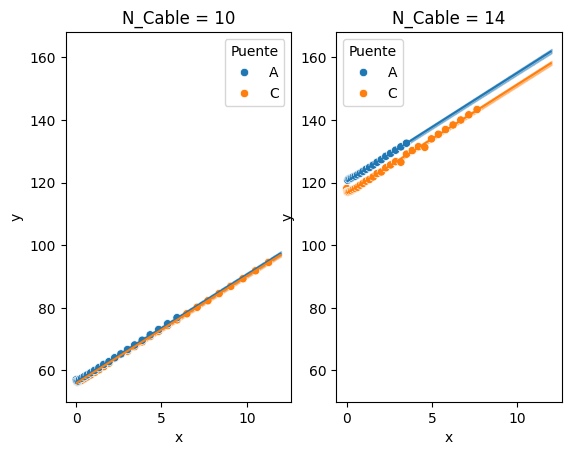

In [ ]:
# Curvas del Modelo
fig, ax = bmb.interpret.plot_predictions(model1,results1,conditional={'x':np.linspace(0,12,1201),'Puente':['A','C'],'N_Cable':[10,14]},pps=True,prob=0.9)

# Agregamos datos
sns.scatterplot(data=df_cables[(df_cables['N_Cable']==10)],x='x',y='y',hue='Puente',ax=ax[0])
sns.scatterplot(data=df_cables[(df_cables['N_Cable']==14)],x='x',y='y',hue='Puente',ax=ax[1])

# Modificamos Grafico
ax[1].sharey(ax[0])
plt.show()

**Actividad**: ¿El módelo se ajusta a los datos observados? ¿En qué parámetros nota diferencias o influencias significativas a simple vista? ¿En cuáles no?

**Su respuesta**:

### Contestando Preguntas

Ya tenemos nuestro modelo completo y las simulaciones de las distribuciones posteriores de los parámetros. Ahora podemos empezar a contestar las preguntas.

#### Actividad 10

¿El efecto de la configuración del puente es significativo? ¿Depende del Cable?

**Actividad**: Proponga un test de hipótesis para determinar si el efecto de la configuración del puente es significativo en cada cable. Si lo es, proponga un segundo test de hipótesis para determinar si esa influencia es distinta en cada cable. Explique el criterio ingenieril utilizado para definir el ROPE en cada cable.

In [ ]:
fig, ax = plt.subplots(1, 2, sharex=True)
# CODIGO DEL ALUMNO ############################################################






################################################################################
plt.show()

In [ ]:
# CODIGO DEL ALUMNO ############################################################

# Si es necesaria Segunda Parte

################################################################################

**Su respuesta**:

#### Actividad 11

¿La rigidez a flexión de los cables es distinta entre sí? ¿Es influyente en el cálculo de tensiones?

**Actividad**: Proponga un test de hipótesis para determinar si la rigidez a flexión de los cables es efectivamente la misma. Luego, proponga un test de hipótesis para determinar si la rigidez a flexión influye significativamente en el modelo. Explique *claramente* en cada caso la razón detrás de su elección del ROPE.

*NOTA: Si considera que la rigidez a flexión es igual para los cables a fines prácticos, puede marginalizar/unificar las simulaciones para hacer el segundo test de hipótesis*

In [ ]:
# CODIGO DEL ALUMNO ############################################################


################################################################################
plt.show()

In [ ]:
# CODIGO DEL ALUMNO ############################################################



################################################################################
plt.show()

**Su respuesta**:

#### Actividad 12

**Actividad**: En función de sus respuestas a las preguntas anteriores, Informe el valor medio y el intervalo de confianza de los esfuerzos a su cliente (informe tantos esfuerzos como crea necesario). Use redondeo en función de las cifras significativas.

In [ ]:
# CODIGO DEL ALUMNO ############################################################





################################################################################

## Ejercicio 3: Predicción del Período Natural de edificios de hormigón

En este segundo ejercicio vamos a concentrarnos más que nada en la evaluación y selección de modelos, a fines de *tal vez* justificar las ecuaciones presentes en el Reglamento ASCE-7 de Estados Unidos (en el cual se basa la línea CIRSOC Argentina) para estimar el período natural de edificaciones de hormigón. El trabajo original y su propuesta corresponde a Goel y Chopra, 1997 ([Link](https://ascelibrary.org/doi/10.1061/%28ASCE%290733-9445%281997%29123%3A11%281454%29))

### Carga del Dataset



In [ ]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving GoelChopraPeriod.csv to GoelChopraPeriod.csv


In [ ]:
#Se crea un DataFrame
df_chopra = pd.read_csv(io.BytesIO(uploaded['GoelChopraPeriod.csv']))
df_chopra.head()

,Structure,No.,Location,ID number,No. of Stories,Height [ft],Width [ft],Length [ft],Ac [sq ft],Ae [%],Earthquake,PGA [g],PGA > 0.15g,Period T [s],Direction
0,RC MRF,1,Emeryville,NaN,30.0,300.0,NaN,NaN,NaN,NaN,Loma Prieta,NaN,No,2.8,Longitudinal
1,RC MRF,2,Los Angeles,NaN,9.0,120.0,NaN,NaN,NaN,NaN,San Fernando,NaN,No,1.4,Longitudinal
2,RC MRF,3,Los Angeles,NaN,14.0,160.0,NaN,NaN,NaN,NaN,San Fernando,NaN,No,1.8,Longitudinal
3,RC MRF,4,Los Angeles,NaN,13.0,166.0,NaN,NaN,NaN,NaN,San Fernando,NaN,No,1.9,Longitudinal
4,RC MRF,5,Los Angeles,ATC_12,10.0,137.5,NaN,NaN,NaN,NaN,San Fernando,NaN,No,1.4,Longitudinal


In [ ]:
df_chopra = df_chopra.rename(columns={"Period T [s]": "T_s", "PGA > 0.15g": "PGA","No. of Stories":"N","Height [ft]":"Height"})
df_chopra_red = df_chopra[['T_s','N','Height','Structure','PGA']]

df_chopra_red.head()

,T_s,N,Height,Structure,PGA
0,2.8,30.0,300.0,RC MRF,No
1,1.4,9.0,120.0,RC MRF,No
2,1.8,14.0,160.0,RC MRF,No
3,1.9,13.0,166.0,RC MRF,No
4,1.4,10.0,137.5,RC MRF,No


Como puede ver, el dataset tiene los siguientes datos de interés para este ejercicio:
- Structure : La tipología estructural. A nosotros nos va a impotar `RC MRF` (Estructuras aporticadas de hormigón)
- No. of Stories: Cantidad de pisos
- Height: Altura del edificio en pies
- PGA>0.15g: Indica si el sisma fue de intensidad moderada (en función de la máxima aceleración registrada)
- Period T [s]: El período natural medido en segundos

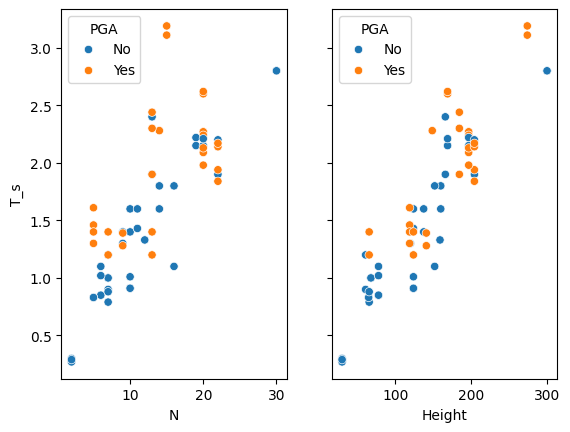

In [ ]:
fig, (axs) = plt.subplots(1, 2)
sns.scatterplot(data=df_chopra_red[(df_chopra_red['Structure']=='RC MRF')].dropna(),x='N',y='T_s',hue='PGA',ax=axs[0])
sns.scatterplot(data=df_chopra_red[(df_chopra_red['Structure']=='RC MRF')].dropna(),x='Height',y='T_s',hue='PGA',ax=axs[1])
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

### Construcción de un modelo Normal

Lo primero que vamos a hacer es contruir un modelo Normal del tipo:

$$y|N \sim Normal(\mu=aN,\sigma)$$

Es decir, donde el período natural es función del número de pisos con desvíos normales.

#### Actividad 1

**Actividad**: Construya el modelo anterior únicamente para estructuras aporticadas de hormigón, marcando claramente las distribuciones a priori adoptadas. Haga la inferencia y confirme que haya convergido, pero no es necesario mostrar más resultados.

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model_1 =
################################################################################

model_1.build()
model_1.graph()

In [ ]:
# Hago la inferencia estadística
results_1 = model_1.fit(chains=4,draws=2000,idata_kwargs={"log_likelihood": True})

# Diagnóstico de la Cadena
az.plot_trace(results_1, compact=False);
plt.show()

# Resumen de la inferencia
az.summary(results_1)

### Nuevo modelo Normal

Probemos ahora otro modelo normal, con una función para el valor medio similar a la que se encuentra actualmente en el reglamento.

$$y|h \sim Normal(\log\mu=a+b\cdot \log h,\sigma)$$

Es decir, el valor medio es una recta logaritmica en función de la altura

#### Actividad 2

**Actividad**: Construya el modelo anterior únicamente para estructuras aporticadas de hormigón. Al no ser un modelo con parámetros por default, defina claramente distribuciones a priori poco informativas.

*Ayuda para definir distribuciones a priori*: la ecuación para el valor medio es $\mu=e^{a}h^{b}$.

- Los estudios analíticos indican que $b\approx0.75$. En estudios en otros países el número ha variado entre $0.5$ y $1$. Si quieren sean más dispersos.
- $a$ es la ordenada a la origen de la recta logarítmica. Ante la duda, pueden centrarla en cero con desvío grande. Podría tomar realmente cualquier valor.


In [ ]:
# CODIGO DEL ALUMNO ############################################################
priors =


model_2 =
################################################################################

model_2.build()
model_2.graph()

In [ ]:
# Grafico las distribuciones a priori
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

In [ ]:
# Hago la inferencia estadística
results_2 = model_2.fit(chains=4,draws=2000,idata_kwargs={"log_likelihood": True})

# Diagnóstico de la Cadena
az.plot_trace(results_2, compact=False);
plt.show()

# Resumen de la inferencia
az.summary(results_2)

### Construcción de un modelo Log-Normal

Finalmente, vamos a probar un modelo Log-Normal, como el que usaron Goel y Chopra.

$$y|h \sim LN(m = a+b\cdot \log h,s)$$

Es decir, que en vez del desvío ser constante, el coeficiente de variación lo es (el desvío crece aproximadamente linealmente con el período).

#### Actividad 3

**Actividad**: Construya el modelo anterior únicamente para estructuras aporticadas de hormigón.

*NOTA: Será necesario transformar los valores de log-verosimilitud para comparar con los otros modelos*

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model_3 =
################################################################################

model_3.build()
model_3.graph()

In [ ]:
# Hago la inferencia estadística
results_3 = model_3.fit(chains=4,draws=2000,idata_kwargs={"log_likelihood": True})

# Diagnóstico de la Cadena
az.plot_trace(results_3, compact=False);
plt.show()

# Resumen de la inferencia
az.summary(results_3)

In [ ]:
# Transformación de los resultados de log-verosimilitud
results_3.map(lambda x: x - results_3.observed_data['log(T_s)'],
                              groups="log_likelihood", inplace=True)

### Consideración de la Intensidad del Sismo

Finalmente, vamos a probar un modelo Log-Normal, como el que usaron Goel y Chopra, donde consideraron que la variable $a$ era distinta según el nivel de intesidad del sismo (Yes o No, que significa que la aceleración superó 0.15g o no), debido a la fisuración presente en sismos de mayor magnitud.

$$y|h,PGA \sim LN(m = a_{PGA}+b\cdot \log h,s)$$

Construyamos este modelo a ver qué ocurre.

#### Actividad 4

**Actividad**: Construya el modelo anterior únicamente para estructuras aporticadas de hormigón.

*NOTA: Será necesario transformar los valores de log-verosimilitud para comparar con los otros modelos*

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model_4 =
################################################################################

model_4.build()
model_4.graph()

In [ ]:
# Hago la inferencia estadística
results_4 = model_4.fit(chains=4,draws=2000,idata_kwargs={"log_likelihood": True})

# Diagnóstico de la Cadena
az.plot_trace(results_4, compact=False);
plt.show()

# Resumen de la inferencia
az.summary(results_4)

In [ ]:
# Transformación de los resultados de log-verosimilitud
results_4.map(lambda x: x - results_4.observed_data['log(T_s)'],
                              groups="log_likelihood", inplace=True)

### Selección de Modelos

Hasta ahora hemos construido 4 modelos para predecir el período natural de las estructuras de hormigón. ¿Pero con cuál me quedo?

Más allá del diagnóstico realizado anteriormente, el objetivo en esta etapa es seleccionar el modelo tomando como referencia únicamante su capacidad predictiva (Mediante Leave-One-Out-CrossValidation).

#### Actividad 5

**Actividad**: Compare los 4 modelos mediante LOO-CV, y seleccione el mejor modelo en función de su diferencia de capacidad predictiva y otros conceptos que crea importantes (cantidad de parámetros, diagnóstico, etc.)

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model_comp =
az_comp_loo =
az_comp_loo
################################################################################

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Modelo 2,0,-13.597120,2.918703,0.000000,6.176258e-01,6.281721,0.000000,False,log
Modelo 4,1,-15.364466,4.177465,1.767347,3.823742e-01,5.668632,4.559903,False,log
Modelo 3,2,-16.696888,3.585653,3.099768,3.377957e-13,6.715567,4.512119,False,log
Modelo 1,3,-49.425581,2.447892,35.828461,0.000000e+00,7.046785,8.624933,False,log


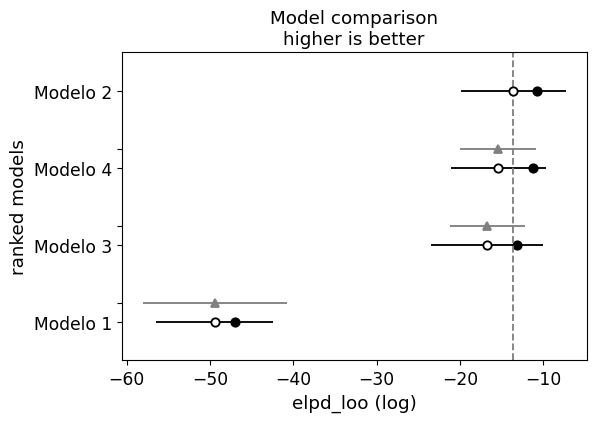

In [ ]:
# CODIGO DEL ALUMNO ############################################################


################################################################################

**Su respuesta**:

#### Actividad 6

**Actividad**: ¿El modelo que eligió es claramente mejor? Si no lo es, ¿que lo llevó a elegirlo? ¿Por qué cree que Goel y Chopra eligieron el Modelo 4?

**Su respuesta**:

### Análisis del Modelo

#### Actividad 7

**Actividad**: Muestre la distribución posterior de los parámetros del modelo "ganador". Si es necesario, transforme el vector de simulaciones así los parámetros graficados sirvan para escribir una función del tipo

$$T_{s} = f(Height) + \varepsilon$$

ya sea según el caso con:
- $f(Height) = a + b \cdot Height$
- $f(Height) = e^{a} \cdot Height^{b} = c \cdot Height^{b}$

In [ ]:
# CODIGO DEL ALUMNO ############################################################







################################################################################

#### Actividad 8

**Actividad**: Construya para el modelo "ganador" un gráfico que contenga:

- Los Datos (identificando los de sismos fuertes)
- La predictiva del período con el intervalo de confianza 68% en función de la altura

In [ ]:
# CODIGO DEL ALUMNO ############################################################





################################################################################

### Uso del modelo

Usted tiene un edificio de 12 pisos (120ft) en California, y quiere conocer su período natural a considerar durante el sismo de diseño (`PGA=Yes`), ya que este influye en las cargas para el cual habrá que diseñarlo.

#### Actividad 9

**Actividad**: Con su modelo seleccionado, obtenga un limite inferior del período natural de su edificio tal que la probabilidad de que ese período sea superado sea de 84%.

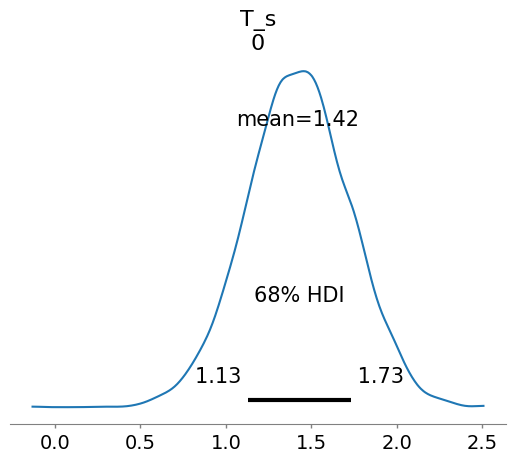

El período de diseño del edificio es de  1.1252979845570783 segundos


In [ ]:
# CODIGO DEL ALUMNO ############################################################







################################################################################

print('El período de diseño del edificio es de ',T_dis,'segundos')

#### Actividad 10

**Actividad**: Compare su resultado con la predicción provista por los reglamentos norteamericanos

$$T_{a} = 0.016\cdot h^{0.9}$$

In [ ]:
# CODIGO DEL ALUMNO ############################################################
T_a =

DeltaT =
################################################################################

print('La estimación reglamentaria para el edificio es de ',T_a,'segundos')
print('La diferencia porcentual es de ',DeltaT*100,'%')

La estimación reglamentaria para el edificio es de  1.1895511032079407 segundos
La diferencia porcentual es de  -5.401459296501575 %


## Avance del TP Integrador

Al momento de la entrega del Trabajo Práctico 3, el grupo ya debiera haber revisado y completado el análsisi exploratorio de datos, de forma tal de haber identificado la variable de interés y potenciales variables explicativas.

**Actividad**: Si tiene una variable de interés continua, realice una regresión lineal contra una de las variables predictoras que desee. Es la variable predictora relevante para la predicción de la de interés?

Realice esto mismo con otra variable predictora.

**Su respuesta**:

# Entrega del Trabajo Práctico

Para la entrega del TP3, siga los siguientes pasos:
1. Vuelva a correr el Colab desde 0 para asegurar que no haya ningún bug y todo funcione tal como se desea (`Disconnect and delete runtime`,`run all`)
2. Revise que todos los resultados estén presentes y como ustedes esperaban.
3. Asegúrese haber contestado todas la preguntas que requieren prosa.
4. Descargue el arcihvo .ipynb en su computadora

Revise que está todo como les gusta y ¡ya está listo! Ustedes son responables de que la entrega refleje sus intenciones, más allá de que nosotros podamos correr su archivo para revisar.

Los datos presentados abajo intentan ser para ustedes (y para nosotros) una verificación de que efectivamente han hecho la revisión final.

In [ ]:
print('Inicio de corrida: ',start_datetime)

end_datetime = datetime.datetime.now()
print('Fin de corrida: ',end_datetime)

elapsed_time = end_datetime-start_datetime
print('Tiempo de ejecución: ',round(elapsed_time.total_seconds()/60,1),'minutos')

Inicio de corrida:  2024-11-15 13:29:38.091295
Fin de corrida:  2024-11-15 14:07:02.057408
Tiempo de ejecución:  37.4 minutos
